# Deep Learning for Medical Imaging 
## Evaluation of a remote sensing segmentationnetwork on medical imaging
### Done by: Mercier Kevin, Chahine Nicolas

In this notebook, we can find the functions to prepare the data, the training, the test results extraction and finally the evaluation functions. 

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
!nvidia-smi
!nvidia-smi --query-gpu=name --format=csv,noheader | wc -l

Sun Mar 29 12:29:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
root_path='/content/drive/My Drive/MVA/DL Medical'
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd $root_path

/content/drive/My Drive/MVA/DL Medical


## Skin Lesion Dataset

### Get Data 

In [0]:
# !wget https://challenge.kitware.com/api/v1/item/5ac37a9d56357d4ff856e176/download -O /tmp/ISIC2018_Task1-2_Training_Input.zip
# !unzip /tmp/ISIC2018_Task1-2_Training_Input.zip -d dataset_isic18
# !wget https://challenge.kitware.com/api/v1/item/5ac3695656357d4ff856e16a/download -O /tmp/ISIC2018_Task1_Training_GroundTruth.zip
# !unzip /tmp/ISIC2018_Task1_Training_GroundTruth.zip -d dataset_isic18
# !wget https://www.kaggle.com/kmader/finding-lungs-in-ct-data/download/vcZ3NrF2YSpZo7G3FRoN%2Fversions%2Fhi7VQic7mT6aYC5Ua221%2Ffiles%2F3d_images.zip
# !unzip 3d_images.zip -d 3d_images

--2020-03-26 13:14:18--  https://raw.githubusercontent.com/rezazad68/BCDU-Net/master/Lung%20Segmentation/Reza_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1632 (1.6K) [text/plain]
Saving to: ‘Reza_functions.py’

Reza_functions.py   100%[===================>]   1.59K  --.-KB/s    in 0s      

2020-03-26 13:14:18 (252 MB/s) - ‘Reza_functions.py’ saved [1632/1632]



## Prepare Data

### Skin Lesion

In [0]:
from __future__ import division
import numpy as np
import scipy.io as sio
import scipy.misc as sc
import glob
from PIL import Image
import PIL
from imageio import imread,imwrite

# Skin Lesion Dataset
def prepare_skin(path = ""):

      # Parameters
      height = 512
      width  = 512
      channels = 3

      # Prepare ISIC 2018 data set #
      Dataset_add = path + 'dataset_isic18/'
      Tr_add = 'ISIC2018_Task1-2_Training_Input'

      Tr_list = glob.glob(Dataset_add+ Tr_add+'/*.jpg')
      # It contains 2594 training samples
      print('Reading ISIC 2018')
      
      for idx in range(len(Tr_list)):
        try:
          print(idx+1)
          img = imread(Tr_list[idx])
          img = np.double(np.array(Image.fromarray(img).resize(size = (height, width),resample = PIL.Image.BILINEAR)))

          b = Tr_list[idx]    
          a = b[0:len(Dataset_add)]
          b = b[len(b)-16: len(b)-4] 
          add = (a+ 'ISIC2018_Task1_Training_GroundTruth/' + b +'_segmentation.png')    
          img2 = imread(add)
          img2 = np.double(np.array(Image.fromarray(img2).resize(size = (height, width),resample = PIL.Image.BILINEAR)))

          img = img.astype(np.uint8)
          img2 = img2.astype(np.uint8)

          if (idx < 1815):
            folder = 'Train/'
          elif (1815 <= idx < 1815+259):
            folder = 'Test/'
          else:
            folder = 'Valid/'

            # save train data
          imwrite(Dataset_add + 'Img/'+ folder + b + '.png',img)
          imwrite(Dataset_add + 'Mask/'+ folder + b +'_segmentation.png',img2)

        except Exception as e:
          print(e)
          print('error in img {}'.format(idx+1))
      
      print('Reading ISIC 2018 finished')

In [0]:
# prepare_skin() # problem avec img 847

Reading ISIC 2018
1
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 1
2
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 2
3
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 3
4
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 4
5
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 5
6
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 6
7
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 7
8
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 8
9
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 9
10
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 10
11
The directory '/content/dataset_isic18/Img/Train' does not exist
error in img 11
12
The directory '/content/dataset_isic18/Img/Train' does not exist
error in

KeyboardInterrupt: ignored

### Lungs

In [0]:

from __future__ import division
import nibabel as nib
import numpy as np
import Reza_functions as RF
import nibabel as nib
import glob
from __future__ import division
import numpy as np
import scipy.io as sio
import scipy.misc as sc
import glob
from PIL import Image
import PIL
from imageio import imread,imwrite
import matplotlib.pyplot as plt


def prepare_lung(path = ""):
      # Define Train data and mask
      Data_train   = []
      Mask_train   = []
      Maska_train  = []
      FOV_train    = []
      
      height, width = 512, 512

      idx_count = 1
      healthy_count = 0
      dataset_add = path + 'dataset_lung/'
      Tr_add =  '3d_images'

      Tr_list = glob.glob(dataset_add + Tr_add+'/*.gz')
      print("Processing dataset")
      
      for idx in range(len(Tr_list)):
          b = Tr_list[idx]
          a = b[len(dataset_add)+len(Tr_add)+1:len(dataset_add)+len(Tr_add)+4]
          print(a)
          if a=='IMG':
            print(idx_count)

            a = b[len(dataset_add)+len(Tr_add)+5:len(b)]
            add = (Tr_add+'/MASK_' + a) 
            vol = nib.load(Tr_list[idx])
            seg = nib.load(dataset_add + add)
            # Get the axials images and corresponding masks
            vol_ims, lung, around_lung, FOV = RF.return_axials(vol, seg) 
            segmentation  = seg.get_data()
            
            # Insert samples to the Train data, which has the segmentation label
            for idx in range(vol.shape[0]):
                if ~( np.sum(np.sum(np.sum(segmentation[idx, :, :]))) == 0):
                    Data_train.append(vol_ims[idx, :, :])
                    Mask_train.append(lung[idx, :, :])
                    Maska_train.append(around_lung[idx, :, :])               
                    FOV_train.append(FOV[idx, :, :]) 
                     
                    healthy_count += 1
            idx_count += 1
       
      alpha = np.int16(np.floor( healthy_count * 0.7))
      print('training data nb: ',alpha)
      count = 0
      print("saving dataset")
      for DT,MT,MAT,FOV in zip(Data_train,Mask_train,Maska_train,FOV_train):
            print(count)

            if count < alpha:
              folder = 'Train/'
            
            else:
              folder = 'Test/'

            img = Image.fromarray(DT).resize(size = (height, width),resample = PIL.Image.BILINEAR)
            img =np.array(img)
            img = np.double(img)
            img = img.astype(np.uint8)
            imwrite(dataset_add + 'Img/'+ folder + 'IMG_' + str(count) +  '.png',img)

            img = Image.fromarray(MT).resize(size = (height, width),resample = PIL.Image.BILINEAR)
            img =np.array(img)
            img = np.double(img)
            img = img.astype(np.uint8)
            imwrite(dataset_add + 'Mask/'+ folder + 'IMG_' + str(count) +  '_mask.png',img)

            img = Image.fromarray(MAT.astype(np.uint32)).resize(size = (height, width),resample = PIL.Image.BILINEAR)
            img =np.array(img)
            img = np.double(img)
            img = img.astype(np.uint8)
            imwrite(dataset_add + 'Maska/' + folder + 'IMG_' + str(count) + '_maska.png',img * 255)

            img = Image.fromarray(FOV.astype(np.uint32)).resize(size = (height, width),resample = PIL.Image.BILINEAR)
            img =np.array(img)
            img = np.double(img)
            img = img.astype(np.uint8)
            imwrite(dataset_add + 'FOV/' + folder + 'IMG_' + str(count) + '_FOV.png',img * 255)             
            
            count += 1
                               
      
      print('Reading Lung data finished')

In [0]:
# prepare_lung()

## Train model

In [0]:
# !git clone https://github.com/KevinMrc/MAPNet.git

Cloning into 'MAPNet'...
remote: Enumerating objects: 291, done.
remote: Total 291 (delta 0), reused 0 (delta 0), pack-reused 291
Receiving objects: 100% (291/291), 3.99 MiB | 19.63 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [0]:
# %run train.py --batch_size 4 --learning_rate 0.0001 --num_epochs 100 --channels 1 --train_img_path './dataset_lung/Img/Train/' --train_mask_path './dataset_lung/Maska/Train/' --test_image_path './dataset_lung/Img/Test/'  --test_mask_path './dataset_lung/Maska/Test/'  --save_mask_train 


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.Dense instead.








Reading checkpoints...
Checkpoint not found
Training from scratch...
Total train image: 714
Total validate image: 307
Total epoch: 100
Batch size: 4
Learning rate: 0.0001
Image shape: 512 x 512 x 1
Data Argument:
h_flip: True
v_flip: True
rotate: True
Epoch 0 |Iter 100 |Loss 0.2733813
Time: 548.1938278675079
Start validation...
validation 0
validation 76
validation 152
validation 228
validation 304


/content/drive/My Drive/MVA/DL Medical/train.py:279: RuntimeWarning: invalid value encountered in long_scalars
  recall = tp / (tp + fn)


Last IOU value: 0.650
New IOU value: 0.000
New Precision: 0.000, Recall: nan, F1: nan, Accuracy: 0.624, Specificity: 0.624
Epoch 1 |Iter 200 |Loss 0.25484866
Epoch 1 |Iter 300 |Loss 0.21403795
Time: 98.73529767990112
Start validation...
validation 0
validation 76
validation 152
validation 228
validation 304
Last IOU value: 0.650
New IOU value: 0.900
New Precision: 0.972, Recall: 0.924, F1: 0.947, Accuracy: 0.959, Specificity: 0.983
Save the checkpoint...
Epoch 2 |Iter 400 |Loss 0.22527446
Epoch 2 |Iter 500 |Loss 0.18029326
Time: 97.56470942497253
Start validation...
validation 0
validation 76
validation 152
validation 228
validation 304
Last IOU value: 0.900
New IOU value: 0.946
New Precision: 0.989, Recall: 0.957, F1: 0.972, Accuracy: 0.979, Specificity: 0.993
Save the checkpoint...
Epoch 3 |Iter 600 |Loss 0.16972852
Epoch 3 |Iter 700 |Loss 0.19433738
Time: 97.53418707847595
Start validation...
validation 0
validation 76
validation 152
validation 228
validation 304
Last IOU value: 0.9

## Test model

### Test Lesion


In [0]:
# %run test.py --crop_size 256 --channels 3 --test_img_path './dataset_isic18/Img/Test/' --test_result_path './dataset_isic18/Results/' --checkpoint_dir './Lesion training/checkpoint/'

In [0]:
from __future__ import division
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from imageio import imread
from PIL import Image
import PIL

def evaluate_skinLesion(img_path = "./dataset_isic18/Img/Test/", test_results_path = "./dataset_isic18/Results/", output_folder = "./output/Skin_Lesion/", test_mask_path = "./dataset_isic18/Mask/Test/"):
    test_results = sorted(glob.glob(r'{}'.format(test_results_path) + r'*.png'))
    y_true = []
    y_scores = []
    te_data = []
    print(len(test_results))
    for j in range(0, len(test_results)):
        x_batch = test_results[j]
        img_name = x_batch.split('/')[-1]
        img_name = img_name.split('.')[0]
        # read img
        true_img = imread(img_path + img_name +'.png')
        true_img = np.double(np.array(Image.fromarray(true_img).resize(size = (256, 256),resample = PIL.Image.BILINEAR)))
        true_img = true_img.astype(np.uint8)
        #read result mask
        result_mask = imread(test_results[j])
        result_mask = result_mask / 255.0
        #read true mask
        true_mask = imread(test_mask_path + img_name +'_segmentation.png')
        true_mask = np.double(np.array(Image.fromarray(true_mask).resize(size = (256, 256),resample = PIL.Image.BILINEAR)))
        true_mask = true_mask / 255.0
        

        y_scores.append(result_mask)
        y_true.append(true_mask)
        te_data.append(true_img)
    
    print('ISIC18 Dataset loaded')
    predictions = np.array(y_scores)
    y_scores = predictions.reshape(-1,1)
    print(y_scores.shape)

    te_mask = np.array(y_true)
    y_true = te_mask.reshape(-1,1)
    print(y_true.shape)


    y_scores = np.where(y_scores>0.5, 1, 0)
    y_true   = np.where(y_true>0.5, 1, 0)

    #Area under the ROC curve
    fpr, tpr, thresholds = roc_curve((y_true), y_scores)
    AUC_ROC = roc_auc_score(y_true, y_scores)
    print ("\nArea under the ROC curve: " +str(AUC_ROC))
    ROC_curve =plt.figure()
    plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
    plt.title('ROC curve')
    plt.xlabel("FPR (False Positive Rate)")
    plt.ylabel("TPR (True Positive Rate)")
    plt.legend(loc="lower right")
    plt.savefig(output_folder+"ROC.png")

    #Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    precision = np.fliplr([precision])[0] 
    recall = np.fliplr([recall])[0]
    AUC_prec_rec = np.trapz(precision,recall)
    print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
    prec_rec_curve = plt.figure()
    plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
    plt.title('Precision - Recall curve')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower right")
    plt.savefig(output_folder+"Precision_recall.png")

    #Confusion matrix
    threshold_confusion = 0.5
    print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
    y_pred = np.empty((y_scores.shape[0]))
    for i in range(y_scores.shape[0]):
        if y_scores[i]>=threshold_confusion:
            y_pred[i]=1
        else:
            y_pred[i]=0
    confusion = confusion_matrix(y_true, y_pred)
    print (confusion)
    accuracy = 0
    if float(np.sum(confusion))!=0:
        accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
    print ("Global Accuracy: " +str(accuracy))
    specificity = 0
    if float(confusion[0,0]+confusion[0,1])!=0:
        specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
    print ("Specificity: " +str(specificity))
    sensitivity = 0
    if float(confusion[1,1]+confusion[1,0])!=0:
        sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
    print ("Sensitivity: " +str(sensitivity))
    precision = 0
    if float(confusion[1,1]+confusion[0,1])!=0:
        precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
    print ("Precision: " +str(precision))

    #Jaccard similarity index
    jaccard_index = jaccard_similarity_score(y_true, y_pred, normalize=True)
    print ("\nJaccard similarity score: " +str(jaccard_index))

    #F1 score
    F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
    print ("\nF1 score (F-measure): " +str(F1_score))

    #Save the results
    file_perf = open(output_folder+'performances.txt', 'w')
    file_perf.write("Area under the ROC curve: "+str(AUC_ROC)
                    + "\nArea under Precision-Recall curve: " +str(AUC_prec_rec)
                    + "\nJaccard similarity score: " +str(jaccard_index)
                    + "\nF1 score (F-measure): " +str(F1_score)
                    +"\n\nConfusion matrix:"
                    +str(confusion)
                    +"\nACCURACY: " +str(accuracy)
                    +"\nSENSITIVITY: " +str(sensitivity)
                    +"\nSPECIFICITY: " +str(specificity)
                    +"\nPRECISION: " +str(precision)
                    )
    file_perf.close()

    # Save 10 results with error rate lower than threshold
    threshold = 300
    predictions = np.where(predictions>0.5, 1, 0)
    te_mask     = np.where(te_mask>0.5, 1, 0)
    good_prediction = np.zeros([predictions.shape[0],1], np.uint8)
    id_m = 0
    for idx in range(predictions.shape[0]):
        esti_sample = predictions[idx]
        true_sample = te_mask[idx]
        esti_sample = esti_sample.reshape(-1, 1)
        true_sample = true_sample.reshape(-1, 1)
        er = 0
        for idy in range(true_sample.shape[0]):
            if esti_sample[idy] != true_sample[idy]:
              er = er +1
        if er <threshold:
          good_prediction[id_m] = idx    
          id_m += 1   

    fig,ax = plt.subplots(10,3,figsize=[20,20])

    for idx in range(10):
        original_image = np.double(np.array(Image.fromarray(te_data[good_prediction[idx,0]]).resize(size = (512, 512),resample = PIL.Image.BILINEAR)))
        ax[idx, 0].imshow(np.uint8(original_image))
        if idx == 0:
          ax[idx, 0].set_title('Original Image')
        true_mask = np.double(np.array(Image.fromarray((te_mask[good_prediction[idx,0]]*255.0).astype(np.uint8)).resize(size = (512, 512),resample = PIL.Image.BILINEAR)))
        ax[idx, 1].imshow(np.uint8(true_mask), cmap='gray')
        if idx == 0:
          ax[idx, 1].set_title('True Mask')
        predicted_mask = np.double(np.array(Image.fromarray((predictions[good_prediction[idx,0]]*255.0).astype(np.uint8)).resize(size = (512, 512),resample = PIL.Image.BILINEAR)))
        ax[idx, 2].imshow(np.uint8(predicted_mask), cmap='gray')
        if idx == 0:
          ax[idx, 2].set_title('Predicted Mask')

    plt.savefig(output_folder+'sample_results.png')






259
ISIC18 Dataset loaded
(16973824, 1)
(16973824, 1)

Area under the ROC curve: 0.9353645750382059

Area under Precision-Recall curve: 0.8896397774010815

Confusion matrix:  Custom threshold (for positive) of 0.5
[[14233691   319192]
 [  259858  2161083]]
Global Accuracy: 0.9658857073102679
Specificity: 0.9780667514471187
Sensitivity: 0.8926623986292933
Precision: 0.8713078186894598


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



Jaccard similarity score: 0.9658857073102679

F1 score (F-measure): 0.8818558496503724


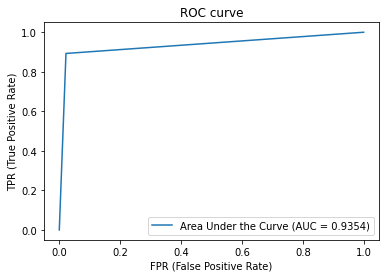

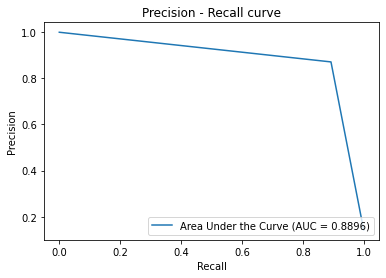

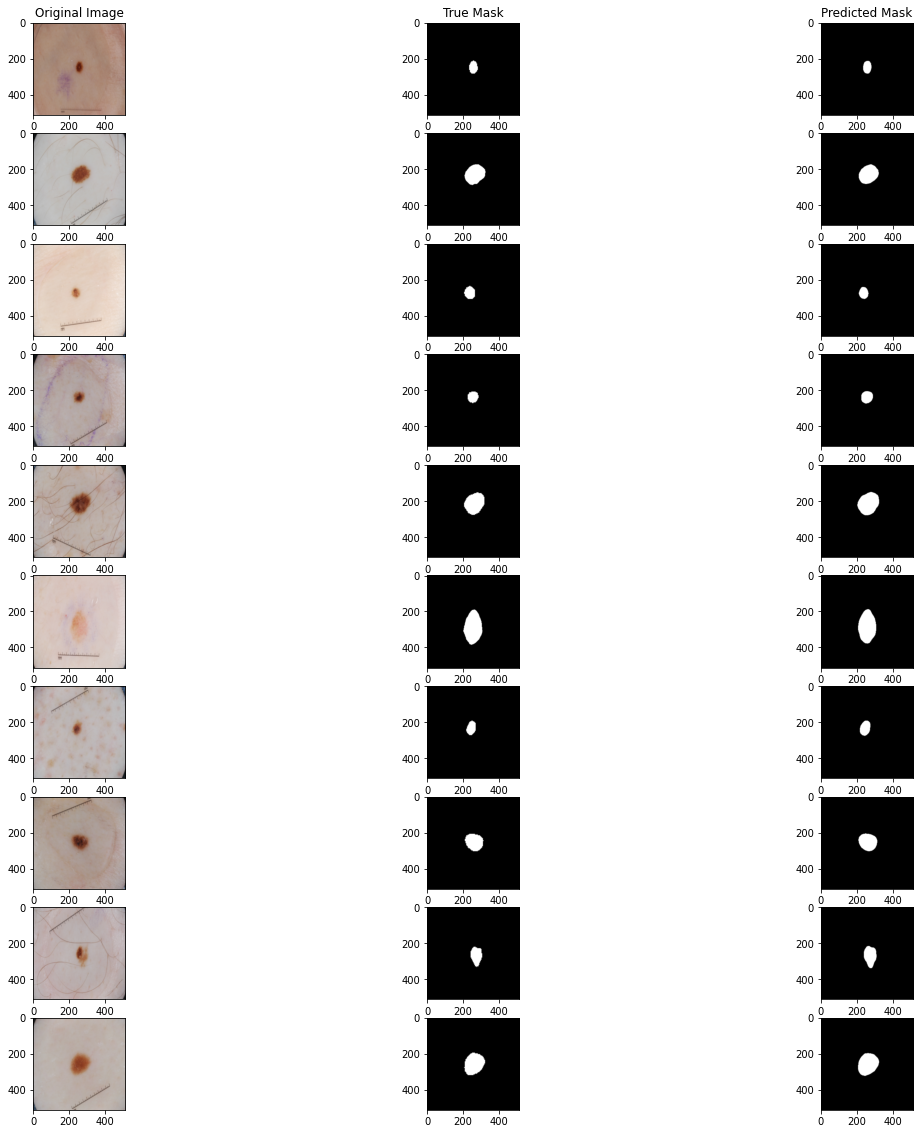

In [0]:
evaluate_skinLesion()

### Test Lung

In [0]:
# %run test.py --crop_size 512 --channels 1 --test_img_path './dataset_lung/Img/Test/' --test_result_path './dataset_lung/Results/' --checkpoint_dir './checkpoint/'

In [0]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from scipy.ndimage.morphology import binary_erosion
from imageio import imread
from PIL import Image
import PIL

def evaluate_lung(img_path = "./dataset_lung/Img/Test/", test_results_path = "./dataset_lung/Results/", output_folder = "./output/Lung/", test_mask_path = "./dataset_lung/Mask/Test/",test_FOV_path = "./dataset_lung/FOV/Test/"):
  
      test_results = sorted(glob.glob(r'{}'.format(test_results_path) + r'*.png'))
    print(len(test_results))

    y_true = []
    # y_scores = []
    te_data = []
    FOV = []
    predictions  = []

    for j in range(0, len(test_results)):
        x_batch = test_results[j]
        img_name = x_batch.split('/')[-1]
        img_name = img_name.split('.')[0]
        # read img
        true_img = imread(img_path + img_name +'.png')
        true_img = true_img.astype(np.uint8)
        #read result mask
        result_mask = imread(test_results[j])
        result_mask = result_mask / 255.0
        #read true mask
        true_mask = imread(test_mask_path + img_name +'_mask.png')
        true_mask = true_mask / 255.0
        #read FOV 
        FOV_mask = imread(test_FOV_path + img_name +'_FOV.png')
        FOV_mask = FOV_mask / 255.0

        predictions.append(result_mask)
        y_true.append(true_mask)
        te_data.append(true_img)
        FOV.append(FOV_mask)

    
    print('Dataset loaded')

    # Post-processing
    predictions = np.array(predictions)
    FOV = np.array(FOV)
    predictions = np.where(predictions>0.5, 1, 0)
    Estimated_lung = np.where((FOV - predictions)>0.5, 1, 0)

    # Performance checking
    y_scores = Estimated_lung.reshape(-1, 1)
    print(y_scores.shape)

    te_mask = np.array(y_true)
    y_true = te_mask.reshape(-1, 1)

    print(y_true.shape)

    y_scores = np.where(y_scores>0.5, 1, 0)
    y_true   = np.where(y_true>0.5, 1, 0)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    #Area under the ROC curve
    fpr, tpr, thresholds = roc_curve((y_true), y_scores)
    AUC_ROC = roc_auc_score(y_true, y_scores)
    print ("\nArea under the ROC curve: " +str(AUC_ROC))
    ROC_curve =plt.figure()
    plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
    plt.title('ROC curve')
    plt.xlabel("FPR (False Positive Rate)")
    plt.ylabel("TPR (True Positive Rate)")
    plt.legend(loc="lower right")
    plt.savefig(output_folder+"ROC.png")

    #Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    precision = np.fliplr([precision])[0] 
    recall = np.fliplr([recall])[0]
    AUC_prec_rec = np.trapz(precision,recall)
    print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
    prec_rec_curve = plt.figure()
    plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
    plt.title('Precision - Recall curve')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="lower right")
    plt.savefig(output_folder+"Precision_recall.png")

    #Confusion matrix
    threshold_confusion = 0.5
    print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
    y_pred = np.empty((y_scores.shape[0]))
    for i in range(y_scores.shape[0]):
        if y_scores[i]>=threshold_confusion:
            y_pred[i]=1
        else:
            y_pred[i]=0
    confusion = confusion_matrix(y_true, y_pred)
    print (confusion)
    accuracy = 0
    if float(np.sum(confusion))!=0:
        accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
    print ("Global Accuracy: " +str(accuracy))
    specificity = 0
    if float(confusion[0,0]+confusion[0,1])!=0:
        specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
    print ("Specificity: " +str(specificity))
    sensitivity = 0
    if float(confusion[1,1]+confusion[1,0])!=0:
        sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
    print ("Sensitivity: " +str(sensitivity))
    precision = 0
    if float(confusion[1,1]+confusion[0,1])!=0:
        precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
    print ("Precision: " +str(precision))

    #Jaccard similarity index
    jaccard_index = jaccard_similarity_score(y_true, y_pred, normalize=True)
    print ("\nJaccard similarity score: " +str(jaccard_index))

    #F1 score
    F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
    print ("\nF1 score (F-measure): " +str(F1_score))

    #Save the results
    file_perf = open(output_folder+'performances.txt', 'w')
    file_perf.write("Area under the ROC curve: "+str(AUC_ROC)
                    + "\nArea under Precision-Recall curve: " +str(AUC_prec_rec)
                    + "\nJaccard similarity score: " +str(jaccard_index)
                    + "\nF1 score (F-measure): " +str(F1_score)
                    +"\n\nConfusion matrix:"
                    +str(confusion)
                    +"\nACCURACY: " +str(accuracy)
                    +"\nSENSITIVITY: " +str(sensitivity)
                    +"\nSPECIFICITY: " +str(specificity)
                    +"\nPRECISION: " +str(precision)
                    )
    file_perf.close()

    # Sample results
    fig,ax = plt.subplots(5, 3, figsize=[15,15])
    all_ind = [1, 100, 200, 253, 193] # random samples
    all_ind = np.array(all_ind)
    for idx in range(5):
        ax[idx, 0].imshow(np.uint8(te_data[all_ind[idx]]),cmap = 'gray')
        ax[idx, 0].set_title('Original Image')
        ax[idx, 1].imshow(np.squeeze(te_mask[all_ind[idx]]), cmap='gray') 
        ax[idx, 1].set_title('True Mask') 
        ax[idx, 2].imshow(np.squeeze(Estimated_lung[all_ind[idx]]), cmap='gray')
        ax[idx, 2].set_title('Predicted Mask')          
            
    plt.savefig(output_folder + 'sample_results.png')


307
Dataset loaded
(80478208, 1)
(80478208, 1)

Area under the ROC curve: 0.9804568243870918

Area under Precision-Recall curve: 0.9680141810886651

Confusion matrix:  Custom threshold (for positive) of 0.5
[[64436534   625812]
 [  454270 14961592]]
Global Accuracy: 0.9865791991789877
Specificity: 0.9903813489910124
Sensitivity: 0.9705322997831713
Precision: 0.9598514287561931


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



Jaccard similarity score: 0.9865791991789877

F1 score (F-measure): 0.9651623154799239


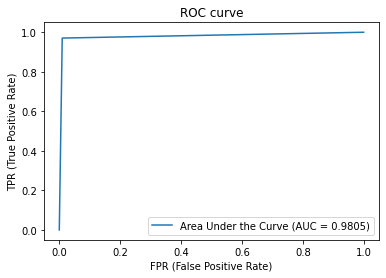

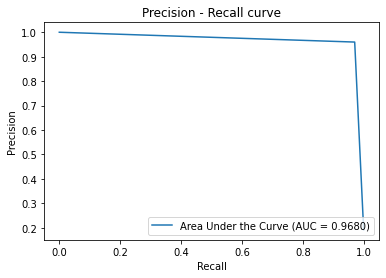

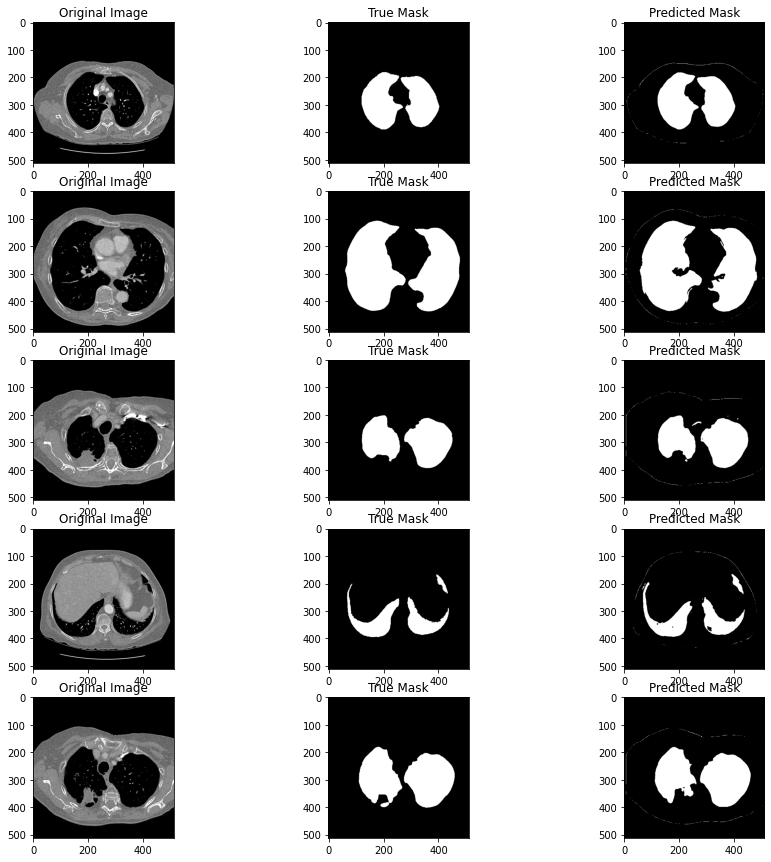

In [0]:
evaluate_lung()